<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Robust-Regression" data-toc-modified-id="Robust-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Robust Regression</a></span></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_i-&amp;\sim-Student(\nu,-\mu,-\sigma)-
\\-\nu--&amp;\sim-Gamma(2,-1)
\\-\mu_i-&amp;=-\beta_0-+-\beta_1x-+-\beta_2x
\\-\beta_0-&amp;\sim-normal(0,-1)
\\-\beta_1-&amp;\sim-normal(0,-1)
\\-\beta_2-&amp;\sim-normal(0,-1)-
\\-\sigma-&amp;\sim-Exponential(1)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_i-&amp;\sim-Student(\nu,-\mu,-\sigma)-
\\-\nu--&amp;\sim-Gamma(2,-1)
\\-\mu_i-&amp;=-\beta_0-+-\beta_1x-+-\beta_2x
\\-\beta_0-&amp;\sim-normal(0,-1)
\\-\beta_1-&amp;\sim-normal(0,-1)
\\-\beta_2-&amp;\sim-normal(0,-1)-
\\-\sigma-&amp;\sim-Exponential(1)
\end{align*}-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <script type="math/tex; mode=display" id="MathJax-Element-15">\begin{align*}
y_i &\sim Student(\nu, \mu, \sigma) 
\\ \nu  &\sim Gamma(2, 1)
\\ \mu_i &= \beta_0 + \beta_1x + \beta_2x
\\ \beta_0 &\sim normal(0, 1)
\\ \beta_1 &\sim normal(0, 1)
\\ \beta_2 &\sim normal(0, 1) 
\\ \sigma &\sim Exponential(1)
\end{align*}</script></a></span></li><li><span><a href="#Step-4---Use-Bayes-rule." data-toc-modified-id="Step-4---Use-Bayes-rule.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 4 - Use Bayes rule.</a></span></li><li><span><a href="#Stan-model-of-a-Bayesian-robust-regression" data-toc-modified-id="Stan-model-of-a-Bayesian-robust-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stan model of a Bayesian robust regression</a></span></li><li><span><a href="#Step-5---Posterior-predictive-checks" data-toc-modified-id="Step-5---Posterior-predictive-checks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5 - Posterior predictive checks</a></span><ul class="toc-item"><li><span><a href="#posterior-p-values" data-toc-modified-id="posterior-p-values-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>posterior p-values</a></span></li></ul></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-robust-regression" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-robust-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reporting the results of the Bayesian robust regression</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li></ul></div>

In [104]:
# Import relveant libraries/packages.
import stan as ps
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

from patsy import dmatrix

import nest_asyncio
nest_asyncio.apply()

In [2]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Robust Regression

# Bayesian inference
<font size = "3"> Following on from that quick description of the classic one sample t-test above its important to keep in mind that Bayesian inference is all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to classical robust methods, it is fundamentally different, because it uses fully probabilistic modelling and the inference is not based on sampling distributions.</font>
    
<font size = "1"> For a fuller description see the practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for the question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If scientific research publication is the goal the priors will need to be accepted by a skeptical audience. This should be achievable using prior predictive checks to ascertain if the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then use the posterior for conducting your inferences.

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for the question under investigation

The data example below is from https://www.sheffield.ac.uk/mash/statistics/datasets. The code below is for conducting Robust regression which differs based on the use of student-t distrtibution as the likelihood function to model the data and accomadate outliers.

## Data description



In [91]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/Crime.csv"
df = pd.read_csv(url)
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


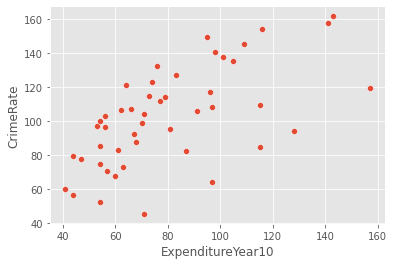

In [53]:
sns.scatterplot(x = "ExpenditureYear10", y = "CrimeRate" ,data=df);

# Step 2 - Define the descriptive statistical model \begin{align*}
y_i &\sim Student(\nu, \mu, \sigma) 
\\ \nu  &\sim Gamma(2, .1)
\\ \mu_i &= \beta_0 + \beta_1x + \beta_2x
\\ \beta_0 &\sim Normal(0, 1)
\\ \beta_1 &\sim Normal(0, 1)
\\ \beta_2 &\sim Normal(0, 1) 
\\ \sigma &\sim Exponential(1)
\end{align*} 

<font size = "3">The formulation for presenting statistical models here follows that used by McElreath (2020) for its intuitive nature. In plain english the model specifies that the dependent variable $y_i$ follows a student-t distribution. Therefore, there are three parameters to specify $\nu, \mu, \sigma$, each with their own prior distributions. $\nu$ has a $Gamma(2, 1)$ distribution. The $\mu$ is made up of the linear model $\mu_i = \beta_0 + \beta_1x + \beta_2x$, each of these $beta$ parameters are given $Normal(0,1)$ priors. Finally the $\sigma$ given and Exponential(1)  

# Step 3 - Specifying priors

The specifification of priors above can be viewed as a set pragamatic choices for the analysis, that are common in Bayesian analysis and for 

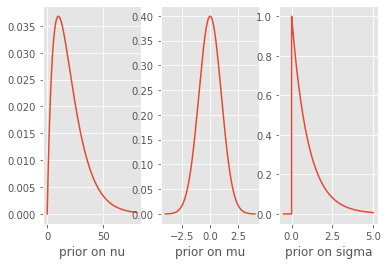

In [35]:
# Visualise prior selcted for all of the beta parameter.

plt.subplot(1, 3, 1)
x = np.arange(-.0, 80, 0.001)
plt.plot(x, stats.gamma.pdf(x, a = 2, scale = 1/.1));
plt.xlabel("prior on nu");

plt.subplot(1, 3, 2)
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1));
plt.xlabel("prior on mu");

# Visualise prior on Standard deviation parameter.
plt.subplot(1, 3 ,3)
x = np.arange(-.5, 5, 0.001)
plt.plot(x, stats.expon.pdf(x, scale = 1));
plt.xlabel("prior on sigma");

# Step 4 - Use Bayes rule.

The software of choice to conduct Bayesian inference on the data here is Stan and the model is specified below.

# Stan model of a Bayesian robust regression

In [101]:
Robust_Regression = """
data {
  int<lower=0> N;   // Sample size
  int<lower=0> K;   // Number of predictor variables
  matrix[N, K] x;   // Predictor variable (IV) matrix
  vector[N] y;      // Vector of Dependent variable (DV) values
}

transformed data{
// Standardise data within Stan

 vector[N] y_std = (y - mean(y)) / sd(y);
 matrix[N, K] x_std;
 for (i in 2:K){
 x_std[,i] = (x[,i] - mean(x[,i])) / sd(x[,i]);
 
  }
}

parameters{
  real<lower = 1> nu;  // degrees of freedom       
  vector[K] beta;       // Coefficients for intercept and predictors
  real<lower=0> sigma;  // Standard deviation
}

model {

//priors
nu ~ gamma(2, .1);

//Vectorised so given each beta parameter the same prior
beta ~ std_normal();

// Maximum entropy prior for sigma term
sigma ~ exponential(1);

//Likelihood
y_std ~ student_t(nu, x_std * beta, sigma);  // likelihood
}


"""

In [100]:
dm = np.asarray(dmatrix(" ~ Wage", data = df))

data = {'N': len(df),
        'K': np.shape(dm)[1],
        'x': dm,
        'y': df["CrimeRate"].values}

In [102]:
# StanModel function can be called and be passed the model string specified above to compile into C++ code.
sm  = ps.build(Robust_Regression, data = data)

Building...



Building: found in cache, done.

In [103]:
fit = sm.sample(num_chains = 2, num_samples = 1000)

Sampling:   0%Sampling: Initialization failed.

RuntimeError: Initialization failed.

In [68]:
az.summary(fit)

arviz - WARNING - Array contains NaN-value.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
nu,17.392,12.643,1.711,39.900,0.316,0.224,1270.0,1024.0,1.0
beta[0],0.060,1.003,-1.885,1.956,0.026,0.021,1488.0,1261.0,1.0
beta[1],0.194,0.007,0.182,0.207,0.000,0.000,1774.0,1548.0,1.0
sigma,20.690,2.135,16.602,24.681,0.057,0.040,1405.0,1028.0,1.0
mean_pv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sd_pv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ypred[0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ypred[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ypred[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ypred[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 5 - Posterior predictive checks

## posterior p-values

# Reporting the results of the Bayesian robust regression

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for reuslts in journal article like the APA guide for reporting frequentist analysis. It is likely there never will be, because as McElreath (2020) explains Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2017) argue visualisations maybe even more key so the all the visualtions above would have to be included with any write up. Anyway below the write up as  below genral follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described an the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>


# References

Juárez, M. A., & Steel, M. F. (2010). Model-based clustering of non-Gaussian panel data based on skew-t distributions. Journal of Business & Economic Statistics, 28(1), 52-66.